In [168]:
import pandas as pd
import os
import seaborn as sns
import matplotlib as plt

In [ ]:
# Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы:
# колонки из самих файлов (product_id, quantity), имя пользователя (name),
# и дату этих покупок (date, соответствует названию папки, где лежит папка с пользователем).

In [158]:
tree = os.walk('/home/jupyter-m.gikalo-16/shared/homeworks/python_ds_miniprojects/4/data')

In [159]:
df = pd.DataFrame(columns = ['product_id', 'quantity', 'name', 'date'])
for i in tree:
    if i[-1] == ['data.csv']:
        df_i = pd.read_csv(i[0] + '/data.csv', usecols = ['product_id', 'quantity'])
        i = i[0].split('/')
        df_i['name'] = i[-1]
        df_i['date'] = i[-2]
        df = pd.concat([df, df_i], ignore_index=True)
print(df)

    product_id quantity            name        date
0           27        4     Petr_Ivanov  2020-12-05
1           89        1     Petr_Ivanov  2020-12-05
2           33        2     Petr_Ivanov  2020-12-05
3            8        3     Petr_Ivanov  2020-12-05
4           16        1     Petr_Ivanov  2020-12-05
..         ...      ...             ...         ...
156         18        4    Petr_Fedorov  2020-12-07
157         94        4    Petr_Fedorov  2020-12-07
158         95        2  Vasiliy_Ivanov  2020-12-07
159         83        3  Vasiliy_Ivanov  2020-12-07
160         64        1  Vasiliy_Ivanov  2020-12-07

[161 rows x 4 columns]


In [ ]:
# Выясните, какой пользователь купил больше всего товаров.

In [160]:
df.quantity.sum()

480

In [ ]:
# Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:

# по оси x – идентификаторы товаров (product_id) 
# по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)

In [163]:
df.groupby('name', as_index = False)\
    .agg({'quantity':'sum'})\
    .sort_values('quantity', ascending = False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


In [173]:
product_quantity = df.groupby('product_id', as_index = False)\
    .agg({'quantity':'sum'})\
    .sort_values('quantity', ascending = False)
product_quantity_top = product_quantity[:10]

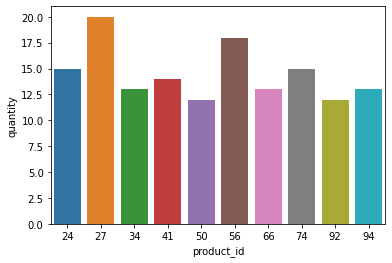

In [174]:
sns.barplot(x = 'product_id', y = 'quantity', data = product_quantity_top)

In [ ]:
# Посмотрим на продажи по дням!
# Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date).

In [198]:
date_quantity = df.groupby('date', as_index = False)\
    .agg({'quantity':'sum'})\
    .sort_values('date')

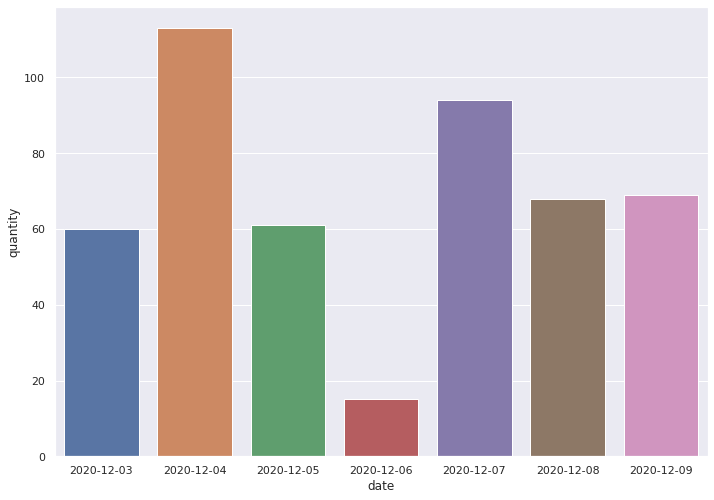

In [202]:
sns.barplot(x = 'date', y = 'quantity', data = date_quantity)
sns.set(rc={'figure.figsize':(5.7,2.27)})

In [ ]:
# Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)?
# Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.
# Например, пользователь Sasha Tsarev дважды приобрел товар 6.
# Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет.
# Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.

In [207]:
non_dup_df = df.drop_duplicates(subset = ['product_id', 'name', 'date'])

In [212]:
non_dup_df.groupby(['name', 'product_id'], as_index = False)\
    .agg({'date':'count'})\
    .query('date > 1')

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2


In [ ]:
# Дополнительный проект

# И небольшой минипроект на фильтрацию данных!

# Имеется таблица с записями о компаниях, включая их ИНН, и отдельный текстовый файл с набором ИНН (колонка head_inn), которые хранятся в папке 4_inn.

# inn.xls — таблица в экселевском формате
# necessary_inn.txt — перечень необходимых ИНН в текстовом формате

# Задачи:
# извлечь из таблицы записи с ИНН, указанными в текстовом файле и записать результат в файл selected_inn.csv

In [222]:
df_inn = pd.read_excel('/home/jupyter-m.gikalo-16/shared/homeworks/python_ds_miniprojects/4_inn/inn.xls')
df_inn.head()

,Unnamed: 0,#,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
0,0,0,"ЗАО «Власова, Макаров и Шашков»",1143692580560,"д. Кирово-Чепецк, пр. Металлургов, д. 537 к. 3...",Жданов Карл Виленович,Маммолог,109092209811,+7 (559) 338-87-76,bogdanovavtonom@yahoo.com,ooo.info,2015-01-07,2006-10-04,21112877268,73423615032,Ulan-Ude,"к. Тосно, ул. Пушкинская, д. 896, 617222",Синхронизация критически важных отношений,54875526078,32205872896
1,1,1,"РАО «Тимофеева, Алексеева и Кузнецова»",9342309660697,"г. Арзамас, наб. Фестивальная, д. 7 стр. 8/2, ...",Рожков Харлампий Алексеевич,Воспитатель,704229465069,8 (632) 620-8879,safonovantonin@rao.org,ooo.net,1990-05-16,2019-01-18,18393547520,19072454279,Tyoply Stan,"ст. Кяхта, бул. Нефтяников, д. 24, 768742",Формирование заказных методик,33876448811,47437574301
2,2,2,РАО «Юдин-Ефимова»,1277485323451,"п. Меренга, алл. Достоевского, д. 3/4 к. 497, ...",Филимон Фадеевич Дьячков,Автослесарь,267655036377,+74925330378,kdorofeev@npo.ru,ao.com,1982-11-04,1986-06-19,56104355836,18629292792,Danilov,"клх Усолье Сибирское, алл. Шишкина, д. 3/9 к. ...",Максимизация корпоративных метрик,94073834991,7701710065
3,3,3,Доронин Инкорпорэйтед,7139161431511,"д. Иваново, ул. Красных Партизан, д. 83 к. 4, ...",Крылов Глеб Якубович,Тюремный надзиратель,362024991175,+7 118 643 21 48,nkulakova@mail.ru,ooo.ru,2005-01-02,2004-04-06,10398489351,32502585383,Beryozovsky,"г. Заводоуковск, ул. Гражданская, д. 7 к. 8/5,...",Разработка ориентированных на пользователя инт...,86971505490,61148002572
4,4,4,Объединенная энергетическая компания,6114798049639,"к. Энгельс, наб. Шишкина, д. 120, 823828",Субботин Вячеслав Федотович,Инженер-электрик,257948948010,8 642 249 2134,evgraf_18@yahoo.com,gerasimova.biz,1983-07-02,1992-06-20,20074507047,40083207999,Bavly,"к. Соль-Илецк, пер. Пригородный, д. 804 к. 1/3...",Монетизация интуитивных веб-сервисов,36351136214,34861533393


In [ ]:
# В качестве проверки укажите сумму колонки income,RUB в отобранных данных.

# NB! У этого набора данных нет заголовка, поэтому вам пригодится аргумент header=None.

In [230]:
inn = pd.read_csv('/home/jupyter-m.gikalo-16/shared/homeworks/python_ds_miniprojects/4_inn/necessary_inn.txt', header = None)
inn.head()

,0
0,394609645484
1,281578625230
2,923769811917
3,998694734508
4,271011690615


In [239]:
inn = inn[0].tolist()

In [241]:
df_nes_inn = df_inn.query('head_inn in @inn')
    

In [242]:
df_nes_inn.to_csv('df_nes_inn.csv')

In [246]:
df_nes_inn['income,RUB'].sum()

6104522627393